# Проверка гипотез

Описание проекта
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Оглавление

# Оглавление:
1. [Открытие данных](#Шаг-1.-Открытие-файла-с-данными-и-изучение-общей-информации)
2. [Предобработка данных](#Шаг-2.-Предобработка-данных)
3. [Анализ полученных данных](#Шаг-3.-Анализ-полученных-данных)
4. [Проверка гипотез](#Шаг-4-проверка-гипотез)
5. [Общий вывод](#Общий-вывод)

# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import scipy
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from math import factorial
import math as math

## Шаг 1. Открытие файла с данными и изучение общей информации

In [2]:
df_calls=pd.read_csv('/datasets/calls.csv')
df_internet=pd.read_csv('/datasets/internet.csv')
df_sms=pd.read_csv('/datasets/messages.csv')
df_tarif=pd.read_csv('/datasets/tariffs.csv')
df_users=pd.read_csv('/datasets/users.csv')

In [3]:
display(df_calls,df_internet,df_sms,df_tarif,df_users)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


---


## Шаг 2.Предобработка данных

Разберемся с типами данных в каждой таблице:

Начнем со звонков

In [4]:
df_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [5]:
df_calls.isnull().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

нулевых  значений нет

Нас интересуют месяца и округление длительности звокнов до минут - принцип Мегалайна

In [6]:
df_calls['call_date']=pd.to_datetime(df_calls['call_date'],format='%Y-%m-%dT%H:%M:%S')
df_calls['month']=df_calls['call_date'].dt.month
print(df_calls)

              id  call_date  duration  user_id  month
0         1000_0 2018-07-25      0.00     1000      7
1         1000_1 2018-08-17      0.00     1000      8
2         1000_2 2018-06-11      2.85     1000      6
3         1000_3 2018-09-21     13.80     1000      9
4         1000_4 2018-12-15      5.18     1000     12
...          ...        ...       ...      ...    ...
202602  1499_215 2018-12-26      0.76     1499     12
202603  1499_216 2018-10-18     18.83     1499     10
202604  1499_217 2018-11-10     10.81     1499     11
202605  1499_218 2018-10-06      4.27     1499     10
202606  1499_219 2018-12-14     19.62     1499     12

[202607 rows x 5 columns]


методом np ceil округлим до верха значения длительности

In [7]:

df_calls['duration_rounded'] = np.ceil(df_calls['duration'])
print(df_calls['duration_rounded'])

0          0.0
1          0.0
2          3.0
3         14.0
4          6.0
          ... 
202602     1.0
202603    19.0
202604    11.0
202605     5.0
202606    20.0
Name: duration_rounded, Length: 202607, dtype: float64


In [8]:
df_calls.groupby(['user_id'])['call_date'].count()
df_calls.isnull().sum()

id                  0
call_date           0
duration            0
user_id             0
month               0
duration_rounded    0
dtype: int64

возьмем перв

In [9]:
df_calls.groupby(['user_id','month']).agg({
    'duration_rounded':['sum'],
    
})

duration_rounded
                           sum
user_id month                 
1000    5                159.0
        6                172.0
        7                340.0
        8                408.0
        9                466.0
...                        ...
1498    10               247.0
1499    9                 70.0
        10               449.0
        11               612.0
        12               492.0

[3174 rows x 1 columns]

In [10]:
df_calls_final=df_calls.groupby(['user_id','month']).agg({
    'duration_rounded':'sum',
    
})

In [11]:
df_calls_final

duration_rounded
user_id month                  
1000    5                 159.0
        6                 172.0
        7                 340.0
        8                 408.0
        9                 466.0
...                         ...
1498    10                247.0
1499    9                  70.0
        10                449.0
        11                612.0
        12                492.0

[3174 rows x 1 columns]

Разберем данные по интернету:

переведем мб в гигабайты.

In [12]:
df_internet['mb_used']=np.ceil(df_internet['mb_used'])
df_internet['gb_used']=df_internet['mb_used']/1024

print(df_internet)



        Unnamed: 0        id  mb_used session_date  user_id   gb_used
0                0    1000_0    113.0   2018-11-25     1000  0.110352
1                1    1000_1   1053.0   2018-09-07     1000  1.028320
2                2    1000_2   1198.0   2018-06-25     1000  1.169922
3                3    1000_3    551.0   2018-08-22     1000  0.538086
4                4    1000_4    303.0   2018-09-24     1000  0.295898
...            ...       ...      ...          ...      ...       ...
149391      149391  1499_152    319.0   2018-10-03     1499  0.311523
149392      149392  1499_153    491.0   2018-12-14     1499  0.479492
149393      149393  1499_154      0.0   2018-10-27     1499  0.000000
149394      149394  1499_155   1247.0   2018-11-26     1499  1.217773
149395      149395  1499_156    545.0   2018-10-26     1499  0.532227

[149396 rows x 6 columns]


In [13]:
df_internet['session_date']=pd.to_datetime(df_internet['session_date'],format='%Y-%m-%dT%H:%M:%S')
df_internet['month']=df_internet['session_date'].dt.month

In [14]:
df_internet.groupby(['user_id','month']).agg({
    'gb_used':['sum'],
    
})

gb_used
                     sum
user_id month           
1000    5       2.203125
        6      22.711914
        7      13.687500
        8      13.740234
        9      14.239258
...                  ...
1498    10     20.121094
1499    9       1.804688
        10     17.391602
        11     17.562500
        12     12.770508

[3203 rows x 1 columns]

In [15]:
df_internet_final=df_internet.groupby(['user_id','month']).agg({
    'gb_used':'sum',
    
})


In [16]:
df_internet_final

gb_used
user_id month           
1000    5       2.203125
        6      22.711914
        7      13.687500
        8      13.740234
        9      14.239258
...                  ...
1498    10     20.121094
1499    9       1.804688
        10     17.391602
        11     17.562500
        12     12.770508

[3203 rows x 1 columns]

перейдем к смс

In [17]:
df_sms.isnull().sum()

id              0
message_date    0
user_id         0
dtype: int64

Количество сообщений можно посчитать по id

In [18]:
df_sms['message_date']=pd.to_datetime(df_sms['message_date'],format='%Y-%m-%dT%H:%M:%S')
df_sms['month']=df_sms['message_date'].dt.month

In [19]:
df_sms['month'].value_counts()

12    20555
11    18244
10    17114
9     14759
8     13088
7     11320
6      8983
5      7298
4      5179
3      3648
2      1924
1       924
Name: month, dtype: int64

In [20]:
df_sms_final=df_sms.groupby(['user_id','month']).agg({'id':'count'})

Соединим получившиеся таблицы

In [21]:
df_pre_final=df_internet_final.merge(df_calls_final,on=['user_id','month'],how='left')


In [22]:
df_pre_final

gb_used  duration_rounded
user_id month                             
1000    5       2.203125             159.0
        6      22.711914             172.0
        7      13.687500             340.0
        8      13.740234             408.0
        9      14.239258             466.0
...                  ...               ...
1498    10     20.121094             247.0
1499    9       1.804688              70.0
        10     17.391602             449.0
        11     17.562500             612.0
        12     12.770508             492.0

[3203 rows x 2 columns]

In [23]:
df_final=df_pre_final.merge(df_sms_final,on=['user_id','month'],how='left')

In [24]:
df_final

gb_used  duration_rounded    id
user_id month                                   
1000    5       2.203125             159.0  22.0
        6      22.711914             172.0  60.0
        7      13.687500             340.0  75.0
        8      13.740234             408.0  81.0
        9      14.239258             466.0  57.0
...                  ...               ...   ...
1498    10     20.121094             247.0  42.0
1499    9       1.804688              70.0  11.0
        10     17.391602             449.0  48.0
        11     17.562500             612.0  59.0
        12     12.770508             492.0  66.0

[3203 rows x 3 columns]

In [25]:
df_final.isnull().sum()

gb_used               0
duration_rounded     40
id                  497
dtype: int64

In [26]:
df_final=df_final.fillna(0)

In [27]:
df_final.isnull().sum()

gb_used             0
duration_rounded    0
id                  0
dtype: int64

In [28]:
df_final=df_final.groupby(['user_id','month']).sum()

In [29]:
df_final.head(20)

gb_used  duration_rounded    id
user_id month                                   
1000    5       2.203125             159.0  22.0
        6      22.711914             172.0  60.0
        7      13.687500             340.0  75.0
        8      13.740234             408.0  81.0
        9      14.239258             466.0  57.0
        10     14.372070             350.0  73.0
        11     14.421875             338.0  58.0
        12      9.596680             333.0  70.0
1001    11     18.019531             430.0   0.0
        12     13.723633             414.0   0.0
1002    6      10.616211             117.0   4.0
        7      17.188477             214.0  11.0
        8      19.870117             289.0  13.0
        9      16.320312             206.0   4.0
        10     13.579102             212.0  10.0
        11     18.173828             243.0  16.0
        12     17.711914             236.0  12.0
1003    8       8.370117             380.0  37.0
        9      12.186523             961.0  91.0
        10     14.432617             855.0  83.0

в таблице юзер нас NaN значения не интересуют так как люди все еще пользуются тарифом и значит считаем их записавшимися до декабря

497 раз некоторые пользователи могли не пользоваться смс вовсе
а 40 раз не звонить в течение  месяца( уезжать в отпуск и отключать тариф)

Осталось ко всему этому посчитать нужные нам цены:

In [30]:
df_users['reg_date']=pd.to_datetime(df_users['reg_date'],format='%Y-%m-%dT%H:%M:%S')
df_users['month_start']=df_users['reg_date'].dt.month


In [31]:
df_finally=df_final.merge(df_users,on=['user_id'],how='left')

In [32]:
df_finally=df_finally.drop(['age','first_name','last_name','city'],axis=1)

In [33]:
df_finally=df_finally.drop(['churn_date'],axis=1)

In [34]:
df_finally

,user_id,gb_used,duration_rounded,id,reg_date,tariff,month_start
0,1000,2.203125,159.0,22.0,2018-05-25,ultra,5
1,1000,22.711914,172.0,60.0,2018-05-25,ultra,5
2,1000,13.687500,340.0,75.0,2018-05-25,ultra,5
3,1000,13.740234,408.0,81.0,2018-05-25,ultra,5
4,1000,14.239258,466.0,57.0,2018-05-25,ultra,5
...,...,...,...,...,...,...,...
3198,1498,20.121094,247.0,42.0,2018-07-19,smart,7
3199,1499,1.804688,70.0,11.0,2018-09-27,smart,9
3200,1499,17.391602,449.0,48.0,2018-09-27,smart,9
3201,1499,17.562500,612.0,59.0,2018-09-27,smart,9


In [35]:
df_finally['month_payment'] = df_finally.month_start.apply(lambda i : i if i < 0 else 1)
df_finally

,user_id,gb_used,duration_rounded,id,reg_date,tariff,month_start,month_payment
0,1000,2.203125,159.0,22.0,2018-05-25,ultra,5,1
1,1000,22.711914,172.0,60.0,2018-05-25,ultra,5,1
2,1000,13.687500,340.0,75.0,2018-05-25,ultra,5,1
3,1000,13.740234,408.0,81.0,2018-05-25,ultra,5,1
4,1000,14.239258,466.0,57.0,2018-05-25,ultra,5,1
...,...,...,...,...,...,...,...,...
3198,1498,20.121094,247.0,42.0,2018-07-19,smart,7,1
3199,1499,1.804688,70.0,11.0,2018-09-27,smart,9,1
3200,1499,17.391602,449.0,48.0,2018-09-27,smart,9,1
3201,1499,17.562500,612.0,59.0,2018-09-27,smart,9,1


Month_start-по своекй сущности значение в виде разовой оплаты юзера в разные месяца

In [36]:
df_finally.isnull().sum()

user_id             0
gb_used             0
duration_rounded    0
id                  0
reg_date            0
tariff              0
month_start         0
month_payment       0
dtype: int64

In [37]:
df_tarif

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [38]:
df_final.head(20)

gb_used  duration_rounded    id
user_id month                                   
1000    5       2.203125             159.0  22.0
        6      22.711914             172.0  60.0
        7      13.687500             340.0  75.0
        8      13.740234             408.0  81.0
        9      14.239258             466.0  57.0
        10     14.372070             350.0  73.0
        11     14.421875             338.0  58.0
        12      9.596680             333.0  70.0
1001    11     18.019531             430.0   0.0
        12     13.723633             414.0   0.0
1002    6      10.616211             117.0   4.0
        7      17.188477             214.0  11.0
        8      19.870117             289.0  13.0
        9      16.320312             206.0   4.0
        10     13.579102             212.0  10.0
        11     18.173828             243.0  16.0
        12     17.711914             236.0  12.0
1003    8       8.370117             380.0  37.0
        9      12.186523             961.0  91.0
        10     14.432617             855.0  83.0

In [39]:
df_tarif['gb_per_month_included']=df_tarif['mb_per_month_included']/1024

In [40]:
df_tarif

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15.0
1,1000,30720,3000,1950,150,1,1,ultra,30.0


In [41]:
df_finally['duration_rounded']=df_finally['duration_rounded'].astype('int')
df_finally['gb_used']=df_finally['gb_used'].astype('int')
df_finally['id']=df_finally['id'].astype('int')
df_finally.groupby('user_id')['month_payment'].count()

user_id
1000     8
1001     2
1002     7
1003     5
1004     8
        ..
1495     5
1496    12
1497     3
1498     4
1499     4
Name: month_payment, Length: 497, dtype: int64

In [42]:
df_tarif

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15.0
1,1000,30720,3000,1950,150,1,1,ultra,30.0


In [43]:
df_finally['tariff_name']=df_finally['tariff']

In [44]:
df_finally.drop('tariff',axis=1)

,user_id,gb_used,duration_rounded,id,reg_date,month_start,month_payment,tariff_name
0,1000,2,159,22,2018-05-25,5,1,ultra
1,1000,22,172,60,2018-05-25,5,1,ultra
2,1000,13,340,75,2018-05-25,5,1,ultra
3,1000,13,408,81,2018-05-25,5,1,ultra
4,1000,14,466,57,2018-05-25,5,1,ultra
...,...,...,...,...,...,...,...,...
3198,1498,20,247,42,2018-07-19,7,1,smart
3199,1499,1,70,11,2018-09-27,9,1,smart
3200,1499,17,449,48,2018-09-27,9,1,smart
3201,1499,17,612,59,2018-09-27,9,1,smart


In [45]:
df_finally_with_tarif=df_finally.merge(df_tarif,on='tariff_name',how='left')

In [46]:
df_1=df_finally_with_tarif

In [47]:
df_1

,user_id,gb_used,duration_rounded,id,reg_date,tariff,month_start,month_payment,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,2,159,22,2018-05-25,ultra,5,1,ultra,1000,30720,3000,1950,150,1,1,30.0
1,1000,22,172,60,2018-05-25,ultra,5,1,ultra,1000,30720,3000,1950,150,1,1,30.0
2,1000,13,340,75,2018-05-25,ultra,5,1,ultra,1000,30720,3000,1950,150,1,1,30.0
3,1000,13,408,81,2018-05-25,ultra,5,1,ultra,1000,30720,3000,1950,150,1,1,30.0
4,1000,14,466,57,2018-05-25,ultra,5,1,ultra,1000,30720,3000,1950,150,1,1,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,1498,20,247,42,2018-07-19,smart,7,1,smart,50,15360,500,550,200,3,3,15.0
3199,1499,1,70,11,2018-09-27,smart,9,1,smart,50,15360,500,550,200,3,3,15.0
3200,1499,17,449,48,2018-09-27,smart,9,1,smart,50,15360,500,550,200,3,3,15.0
3201,1499,17,612,59,2018-09-27,smart,9,1,smart,50,15360,500,550,200,3,3,15.0


сделаем функцию для подсчета итоговых значений с которыми будем работать:

In [48]:
def month_calc(row):
    
    calls = row['duration_rounded']
    messages=row['id']
    internet=row['gb_used']
    tariff = row['tariff']
    
    minutes_lim = df_tarif.loc[df_tarif['tariff_name'] == tariff, 'minutes_included'].array[0]
    messages_lim=df_tarif.loc[df_tarif['tariff_name']==tariff,'messages_included'].array[0]
    internet_lim=df_tarif.loc[df_tarif['tariff_name']==tariff, 'gb_per_month_included'].array[0]
   
    call_overlimit = max(calls - minutes_lim, 0)
    call_overpay = call_overlimit * df_tarif.loc[df_tarif['tariff_name'] == tariff, 'rub_per_minute'].array[0]
    internet_overlimit=max(internet-internet_lim,0)
    
    messages_overlimit=max(messages-messages_lim,0)
    messages_overpay=messages_overlimit  * df_tarif.loc[df_tarif['tariff_name']==tariff, 'rub_per_message'].array[0]
    internet_overpay=internet_overlimit * df_tarif.loc[df_tarif['tariff_name']==tariff,'rub_per_gb'].array[0]
    return call_overlimit+messages_overpay+internet_overpay+df_tarif.loc[df_tarif['tariff_name'] == tariff, 'rub_monthly_fee'].array[0]
df_function=df_1.apply(month_calc,axis=1)

    

In [49]:
df_1['final_price']=df_function

In [50]:
df_1

,user_id,gb_used,duration_rounded,id,reg_date,tariff,month_start,month_payment,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,final_price
0,1000,2,159,22,2018-05-25,ultra,5,1,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
1,1000,22,172,60,2018-05-25,ultra,5,1,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
2,1000,13,340,75,2018-05-25,ultra,5,1,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
3,1000,13,408,81,2018-05-25,ultra,5,1,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
4,1000,14,466,57,2018-05-25,ultra,5,1,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,1498,20,247,42,2018-07-19,smart,7,1,smart,50,15360,500,550,200,3,3,15.0,1550.0
3199,1499,1,70,11,2018-09-27,smart,9,1,smart,50,15360,500,550,200,3,3,15.0,550.0
3200,1499,17,449,48,2018-09-27,smart,9,1,smart,50,15360,500,550,200,3,3,15.0,950.0
3201,1499,17,612,59,2018-09-27,smart,9,1,smart,50,15360,500,550,200,3,3,15.0,1089.0


почистим от лишних столбцов

In [51]:
df_1=df_1.drop([
    'reg_date','messages_included','tariff_name','mb_per_month_included','minutes_included','rub_per_message','gb_per_month_included'
],axis=1)

In [52]:
df_1=df_1.drop(['rub_per_gb','rub_per_minute'],axis=1)

In [53]:
df_1

,user_id,gb_used,duration_rounded,id,tariff,month_start,month_payment,rub_monthly_fee,final_price
0,1000,2,159,22,ultra,5,1,1950,1950.0
1,1000,22,172,60,ultra,5,1,1950,1950.0
2,1000,13,340,75,ultra,5,1,1950,1950.0
3,1000,13,408,81,ultra,5,1,1950,1950.0
4,1000,14,466,57,ultra,5,1,1950,1950.0
...,...,...,...,...,...,...,...,...,...
3198,1498,20,247,42,smart,7,1,550,1550.0
3199,1499,1,70,11,smart,9,1,550,550.0
3200,1499,17,449,48,smart,9,1,550,950.0
3201,1499,17,612,59,smart,9,1,550,1089.0


In [54]:
df_1

,user_id,gb_used,duration_rounded,id,tariff,month_start,month_payment,rub_monthly_fee,final_price
0,1000,2,159,22,ultra,5,1,1950,1950.0
1,1000,22,172,60,ultra,5,1,1950,1950.0
2,1000,13,340,75,ultra,5,1,1950,1950.0
3,1000,13,408,81,ultra,5,1,1950,1950.0
4,1000,14,466,57,ultra,5,1,1950,1950.0
...,...,...,...,...,...,...,...,...,...
3198,1498,20,247,42,smart,7,1,550,1550.0
3199,1499,1,70,11,smart,9,1,550,550.0
3200,1499,17,449,48,smart,9,1,550,950.0
3201,1499,17,612,59,smart,9,1,550,1089.0


с этой таблицей И будем работать. напомню month_payment= разовость платежа

##  Шаг 3. Анализ полученных данных

In [55]:
df_1_for_math=df_1.drop(['month_payment','rub_monthly_fee'],axis=1)

In [56]:
df_1_for_math.mean()

user_id             1251.393069
gb_used               16.391196
duration_rounded     452.086481
id                    38.325944
month_start            4.719013
final_price         1385.739307
dtype: float64

### выведем средние значения для всех пользователей по тарифам

In [57]:
df_smart=df_1_for_math.query('tariff == "smart"')

In [58]:
df_smart

,user_id,gb_used,duration_rounded,id,tariff,month_start,final_price
8,1001,18,430,0,smart,11,1150.0
9,1001,13,414,0,smart,11,550.0
10,1002,10,117,4,smart,6,550.0
11,1002,17,214,11,smart,6,950.0
12,1002,19,289,13,smart,6,1350.0
...,...,...,...,...,...,...,...
3198,1498,20,247,42,smart,7,1550.0
3199,1499,1,70,11,smart,9,550.0
3200,1499,17,449,48,smart,9,950.0
3201,1499,17,612,59,smart,9,1089.0


In [59]:
df_ultra=df_1_for_math.query('tariff == "ultra"')

In [60]:
df_ultra

,user_id,gb_used,duration_rounded,id,tariff,month_start,final_price
0,1000,2,159,22,ultra,5,1950.0
1,1000,22,172,60,ultra,5,1950.0
2,1000,13,340,75,ultra,5,1950.0
3,1000,13,408,81,ultra,5,1950.0
4,1000,14,466,57,ultra,5,1950.0
...,...,...,...,...,...,...,...
3175,1495,2,92,13,ultra,8,1950.0
3176,1495,32,813,82,ultra,8,2250.0
3177,1495,28,1030,82,ultra,8,1950.0
3178,1495,38,954,79,ultra,8,3150.0


#### среднее для таблиц:

In [61]:
df_ultra_mean=df_ultra[['gb_used','duration_rounded','id','final_price']].mean()

In [62]:
df_ultra_mean

gb_used               18.730256
duration_rounded     529.749744
id                    49.585641
final_price         2051.692308
dtype: float64

In [63]:
df_smart_mean=df_smart[['gb_used','duration_rounded','id','final_price']].mean()

In [64]:
df_smart_mean

gb_used               15.367594
duration_rounded     418.100090
id                    33.398564
final_price         1094.310144
dtype: float64

#### Дисперсия

In [65]:
variance_ultra = np.var(df_ultra[['gb_used','duration_rounded','id','final_price']],ddof=1)
variance_smart = np.var(df_smart[['gb_used','duration_rounded','id','final_price']],ddof=1)

In [66]:
variance_ultra=variance_ultra
variance_ultra

gb_used                 94.310121
duration_rounded    100883.818211
id                    2301.924640
final_price         115800.521245
dtype: float64

In [67]:
variance_smart=variance_smart
variance_smart

gb_used                 33.054306
duration_rounded     36174.763664
id                     796.699630
final_price         487054.493350
dtype: float64

#### Стандартное отклонение:

In [68]:
standard_dev_ultra=np.std(df_ultra[['gb_used','duration_rounded','id','final_price']],ddof=1)
standard_dev_ultra

gb_used               9.711340
duration_rounded    317.622131
id                   47.978377
final_price         340.294756
dtype: float64

In [69]:
standard_dev_smart=np.std(df_smart[['gb_used','duration_rounded','id','final_price']],ddof=1)
standard_dev_smart

gb_used               5.749287
duration_rounded    190.196645
id                   28.225868
final_price         697.892895
dtype: float64

#### проверка:

In [70]:
standard_dev_sqrt_ultra=standard_dev_ultra**2
standard_dev_sqrt_smart=standard_dev_smart**2

In [71]:
standard_dev_sqrt_ultra

gb_used                 94.310121
duration_rounded    100883.818211
id                    2301.924640
final_price         115800.521245
dtype: float64

In [72]:
standard_dev_sqrt_smart

gb_used                 33.054306
duration_rounded     36174.763664
id                     796.699630
final_price         487054.493350
dtype: float64

на основе значений проверяем тип распределения

In [73]:
x=df_ultra_mean+(3*standard_dev_ultra),df_smart_mean+(3*standard_dev_smart)
#print('Интервал:
x

(gb_used               47.864276
 duration_rounded    1482.616137
 id                   193.520771
 final_price         3072.576577
 dtype: float64,
 gb_used               32.615457
 duration_rounded     988.690024
 id                   118.076168
 final_price         3187.988830
 dtype: float64)

отрицательное значение сигм нам не нужно

### сделаем гистограммы

Разделим на два мини дата-сета по тарифам

In [74]:
df_ultra_1=df_ultra[['gb_used','duration_rounded','id','final_price']]


In [75]:
df_ultra_1

,gb_used,duration_rounded,id,final_price
0,2,159,22,1950.0
1,22,172,60,1950.0
2,13,340,75,1950.0
3,13,408,81,1950.0
4,14,466,57,1950.0
...,...,...,...,...
3175,2,92,13,1950.0
3176,32,813,82,2250.0
3177,28,1030,82,1950.0
3178,38,954,79,3150.0


построим гистограммы для каждого нужного по заданию парметров

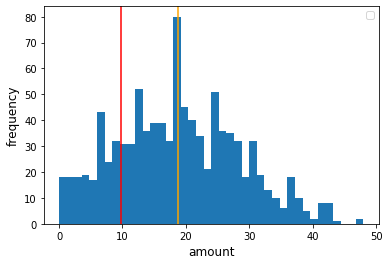

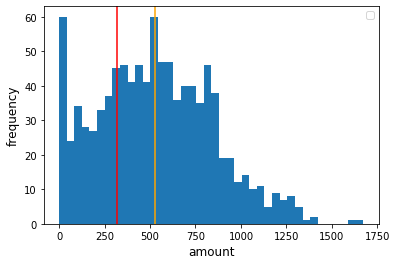

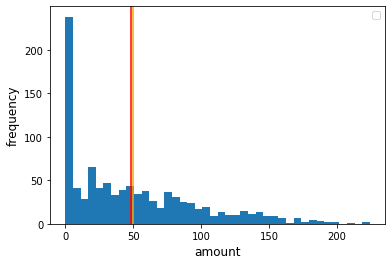

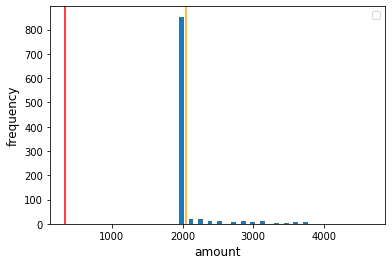

In [76]:
#for element in df_ultra_1:
#df_ultra_1.plot(subplots=True,kind='hist',bins=100)
#fig, ax = plt.subplots(df_ultra_1,df_ultra_1)
#plt.boxplot(df_ultra_1[i])
#plt.subplots
tickers=['gb_used','duration_rounded','id','final_price']
for i in df_ultra_1.columns:
    
   
    plt.figure()
    plt.xlabel('amount',fontsize=12)
    plt.ylabel('frequency', fontsize=12)
    plt.legend(df_ultra_1[i],)
    plt.hist(df_ultra_1[i],bins=40,label='tickers')
    plt.axvline(df_ultra_1[i].mean(), c='orange')
    plt.axvline(np.std(df_ultra_1[i],ddof=1),c='red')
    plt.show()
    
    

желтая линия-среднее,красная-стандартное отклонение

Распределения у тарифа ультра следущие:Нормальное и 2 пуассоновских

In [77]:
df_smart_1=df_smart[['gb_used','duration_rounded','id','final_price']]

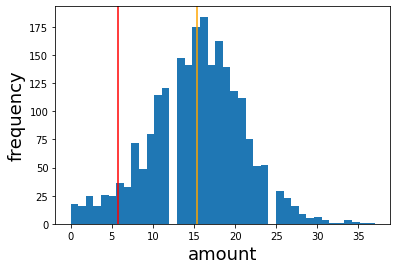

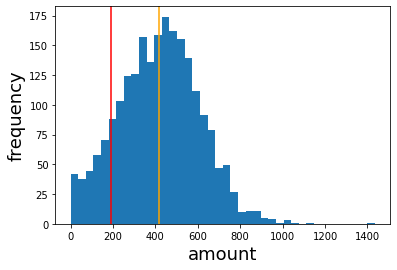

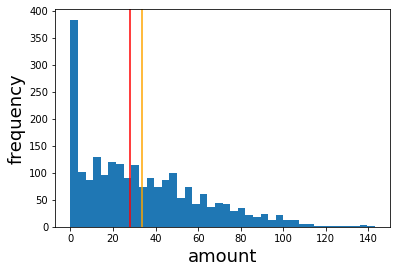

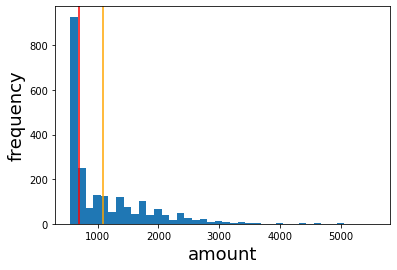

In [78]:
for i in df_smart_1.columns:
    plt.figure()
    plt.xlabel('amount',fontsize=18)
    plt.ylabel('frequency', fontsize=18)
    plt.hist(df_smart_1[i],bins=40)        
    plt.axvline(df_smart_1[i].mean(), c='orange')
    plt.axvline(np.std(df_smart_1[i],ddof=1),c='red')
    plt.show()


## Шаг 4 проверка гипотез


Мы получили численные данные всех нужных нам переменных и нас интересует первая часть для выдвижения гипотез.

гипотеза номер 0:средняя выручка пользователей тарифов «Ультра» и «Смарт»  не различается;

в качестве нулевой H0=возьмем ее

тогда H1=средняя выручка пользователей тарифов «Ультра» и «Смарт»  различается;

так как значений мало то мы возьмем уровень статистической значимости alpha=0.01 чтоб подтвердить точность

для проверки гипотез использовал критерий стьюдента 

Берем среднее из тарифа ультра и сравниваем по смарту.

In [124]:
x=df_1.loc[df_1['tariff']=='ultra', 'final_price'].mean()
y=df_1.loc[df_1['tariff']=='smart', 'final_price']

alpha=0.05

results = st.ttest_1samp(y,x)
print('p-значение:',results.pvalue/2)

if (results.pvalue/2 < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


Проверка двухсторонняя так как мы можем наблюдать различия как на увеличение так и на уменьшение,так как поведение цены может быть разнным

Так как мы отввергаем нулевую гипотезу из этого делаем вывод что в ход идет альтернативная, что средняя выручка отличается между тарифами в пользу смарта

#### перейдем ко второй части вопроса:

средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

средняя выручка пользователей из Москвы НЕ ОТЛИЧАЕТСЯ от выручки пользователей из других регионов- наша нулевая гипотеза

средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов- наша нулевая гипотеза- альтернативная

соединим таблицы для получения значений:

In [80]:
df_1

,user_id,gb_used,duration_rounded,id,tariff,month_start,month_payment,rub_monthly_fee,final_price
0,1000,2,159,22,ultra,5,1,1950,1950.0
1,1000,22,172,60,ultra,5,1,1950,1950.0
2,1000,13,340,75,ultra,5,1,1950,1950.0
3,1000,13,408,81,ultra,5,1,1950,1950.0
4,1000,14,466,57,ultra,5,1,1950,1950.0
...,...,...,...,...,...,...,...,...,...
3198,1498,20,247,42,smart,7,1,550,1550.0
3199,1499,1,70,11,smart,9,1,550,550.0
3200,1499,17,449,48,smart,9,1,550,950.0
3201,1499,17,612,59,smart,9,1,550,1089.0


In [81]:
df_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_start
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,8
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5
...,...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra,8
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart,1
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart,10
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,7


In [82]:
df_final_task_2=df_1.merge(df_users,on='user_id',how='left')

In [83]:
df_final_task_2=df_final_task_2.drop(['age','last_name','first_name','reg_date','tariff_y','month_start_y','churn_date'],axis=1)

In [84]:
df_final_task_2

,user_id,gb_used,duration_rounded,id,tariff_x,month_start_x,month_payment,rub_monthly_fee,final_price,city
0,1000,2,159,22,ultra,5,1,1950,1950.0,Краснодар
1,1000,22,172,60,ultra,5,1,1950,1950.0,Краснодар
2,1000,13,340,75,ultra,5,1,1950,1950.0,Краснодар
3,1000,13,408,81,ultra,5,1,1950,1950.0,Краснодар
4,1000,14,466,57,ultra,5,1,1950,1950.0,Краснодар
...,...,...,...,...,...,...,...,...,...,...
3198,1498,20,247,42,smart,7,1,550,1550.0,Владикавказ
3199,1499,1,70,11,smart,9,1,550,550.0,Пермь
3200,1499,17,449,48,smart,9,1,550,950.0,Пермь
3201,1499,17,612,59,smart,9,1,550,1089.0,Пермь


In [106]:
x_1=df_final_task_2.loc[df_final_task_2['city']=='Москва', 'final_price']
y_1=df_final_task_2.loc[df_final_task_2['city']!='Москва', 'final_price'].mean()
print(x_1.mean(),y_1.mean())



1420.1865793780687 1377.619212962963


In [125]:
x_1=df_final_task_2.loc[df_final_task_2['city']=='Москва', 'final_price']
y_1=df_final_task_2.loc[df_final_task_2['city']!='Москва', 'final_price'].mean()


alpha=0.05

results = st.ttest_1samp(x_1,y_1)
print('p-значение:',results.pvalue)

if (results.pvalue  < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14789596314238118
Не получилось отвергнуть нулевую гипотезу


цифры средних значений говорят сами за себя 1420.1865793780687 1377.619212962963 =>верояности попаданий одних значений в совокупность других довольно высокая,а значит отвергать гипотезу что "средняя выручка пользователей из Москвы НЕ ОТЛИЧАЕТСЯ "- мы не можем так как она не отличается)

# Общий вывод

######  Мы исследовали два тарифа для мегалайна.
---
Исследовали данные обработали их, вытащили данные об оплатах по месяцам при помощи которых производили дальнейшие расчеты, построили графики показывающие нужные нам математические переменные такие как стандартное отклонение,дисперсия,среднее.
при помощи статистического анализа смогли выдвинуть гипотезы и как принять так и опровергнуть их
хочу отметить следующие выводы:
- ультра изначально с высокой  стоимостью в ходе исследования выяснили что им пользовалось примерно 30 процентов.
- смартом-70%
- в ходе проверки гипотез статистического анализа к выводам что выручка разная, выгоднее смарт
- проверили зависимость выручки от городов
- 0 гипотезы не подтверждаются но имеют место быть, а значит факт того,что средняя выручка пользователей из Москвы не отличается от других регионов- имеет место быть